# **ROC-AUC**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [2]:
X, y = make_classification(
    n_samples=500,
    n_features=5,
    n_classes=2,
    random_state=42,
    n_informative=3,
    n_redundant=0
)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print("size of train set:", x_train.shape[0])
print("size of test set:", x_test.shape[0])

size of train set: 400
size of test set: 100


In [7]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression()

In [10]:
y_probs = clf.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

roc_auc = auc(fpr, tpr)

print("AUC score:", round(roc_auc, 4))

AUC score: 0.9328


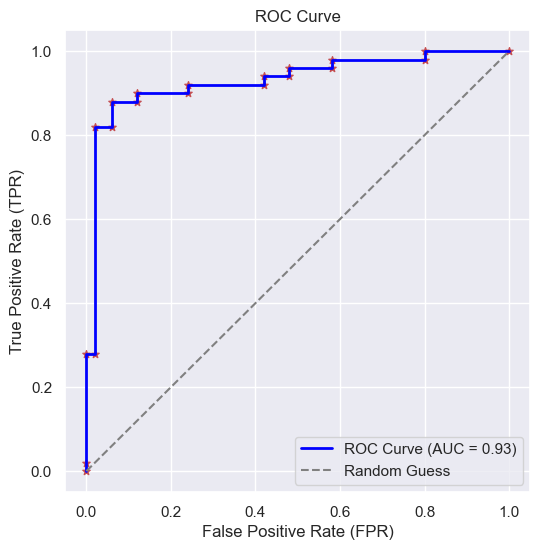

In [16]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color= 'blue', lw = 2, label = f"ROC Curve (AUC = {roc_auc:.2f})")
plt.scatter(fpr, tpr, marker="*", s = 30, color = 'r')
plt.plot([0,1], [0, 1], color = 'gray', linestyle = '--', label = "Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()